In [10]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import os
%matplotlib inline

In [11]:
# Sets up an array of images
                
# Write the path of the image
p_base = 'TestImages/jupiterstormframes/'
p_A = p_base
f_A = []
for root, dirs, files in os.walk(p_base):
    for file in files:
        # Filter images by names
        if file.endswith("png"):
            f_A.append(os.path.join(root, file))

6


(Text(0.5,1,'Gaussian Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

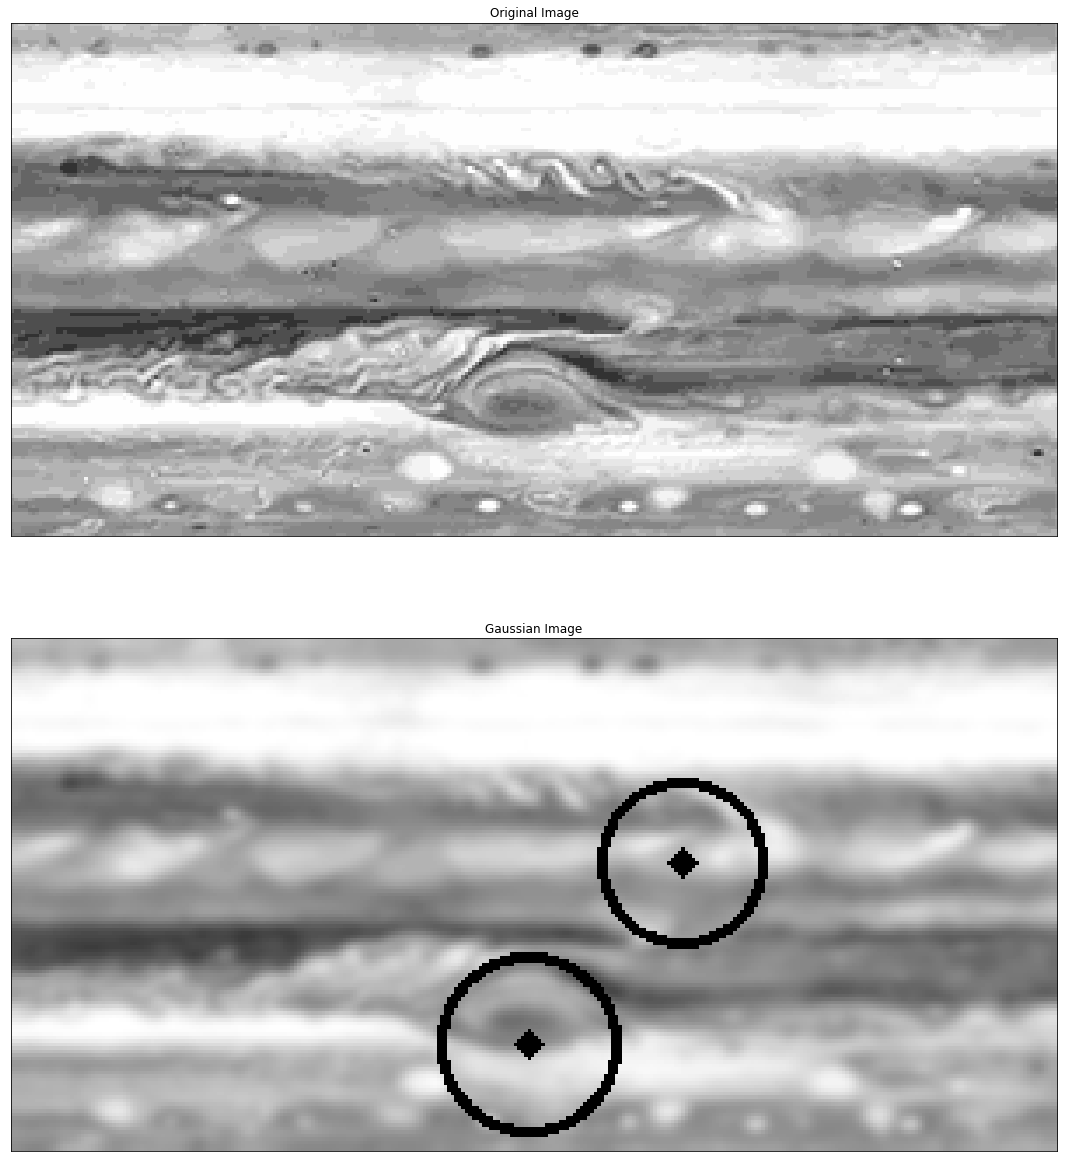

In [14]:
# Read Source Image, the '0' can be changed to switch images
img = cv.imread(f_A[50])

# Convert Image to Grayscale, the proper format for calling other image enhancement functions
grays = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imwrite("grays.jpg", grays)

# Blur Image to smooth out noise
blurred = cv.medianBlur(grays, 5)
cv.imwrite("blurred.jpg", blurred)

gaussianblurred = cv.GaussianBlur( grays, (9, 9), 0);
cv.imwrite("gaussianblurred.jpg", gaussianblurred);

circles = cv.HoughCircles(gaussianblurred,cv.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=1,maxRadius=50)
circles = np.uint16(np.around(circles))
print (circles.size)
for i in circles[0,:]:
  cv.circle(gaussianblurred,(i[0],i[1]),i[2],(0,255,0),2)
  cv.circle(gaussianblurred,(i[0],i[1]),2,(0,0,255),3)
    
# Sets the printed Image size
plt.figure(figsize=(100,100))

# Print Images
plt.subplot(911),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(912),plt.imshow(gaussianblurred,cmap = 'gray')
plt.title('Gaussian Image'), plt.xticks([]), plt.yticks([])